In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# load data
train_data = '/Users/macbookpro/Documents/CVcourse/data/train'
test_data = '/Users/macbookpro/Documents/CVcourse/data/test'

In [3]:
# define image generator
num_train = 28709
num_test = 7178
batch_size = 64
num_epoch = 50

datagen_train = ImageDataGenerator(rescale=1/255,
                                  horizontal_flip=True)
datagen_test = ImageDataGenerator(rescale=1/255,
                                 horizontal_flip=True)

train_gen = datagen_train.flow_from_directory(
        train_data,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_gen = datagen_test.flow_from_directory(
        test_data,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Create Model CNN (Convolutional Neural Network)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [5]:
# Function for model evaluation
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    
    # history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    fig.savefig('plot.png')
    plt.show()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
448/448 [==============================] - 631s 1s/step - loss: 1.7200 - accuracy: 0.3048 - val_loss: 1.5308 - val_accuracy: 0.3975
Epoch 2/50
448/448 [==============================] - 571s 1s/step - loss: 1.4536 - accuracy: 0.4367 - val_loss: 1.3336 - val_accuracy: 0.4879
Epoch 3/50
448/448 [==============================] - 574s 1s/step - loss: 1.3058 - accuracy: 0.4988 - val_loss: 1.2135 - val_accuracy: 0.5386
Epoch 4/50
448/448 [==============================] - 596s 1s/step - loss: 1.2347 - accuracy: 0.5293 - val_loss: 1.1711 - val_accuracy: 0.5484
Epoch 5/50
448/448 [==============================] - 584s 1s/step - loss: 1.1861 - accuracy: 0.5501 - val_loss: 1.1433 - val_accuracy: 0.5635
Epoch 6/50
448/448 [==============================] - 591s 1s/step - loss: 1.1445 - accuracy: 0.5647 - val_loss: 1.1217 - val_accuracy: 0.5716
Epoch 7/50
448/448 [==============================] - 557s 1s/step

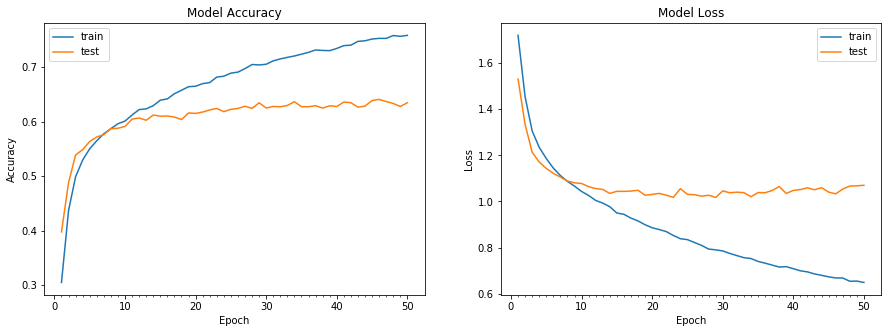

In [6]:
# Train Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
model_info = model.fit_generator(
train_gen,
steps_per_epoch = num_train // batch_size,
            epochs = num_epoch,
            validation_data = test_gen,
            validation_steps = num_test // batch_size
    )
plot_model_history(model_info)
model.save_weights('model.h5')